In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [50]:
#reading the data
data=pd.read_csv("Crop_recommendation.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [51]:
#identifying shape of data
data.shape

(2200, 8)

In [68]:
# Identify duplicate rows
duplicate_rows = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [52]:
#counting null values
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [16]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


# DATA VISUALIZATION


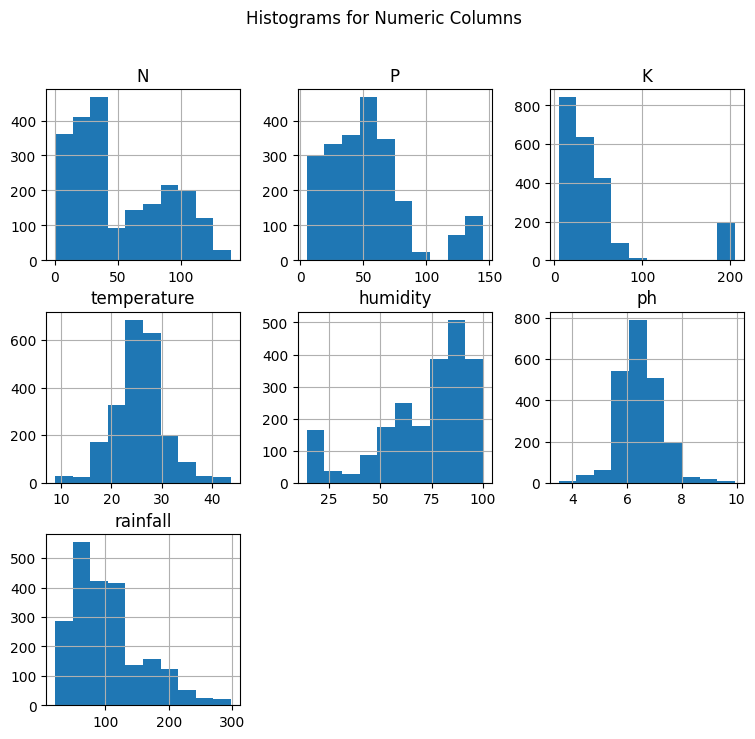

In [66]:
# Histogram for the numeric columns
data.hist(bins=10, figsize=(9, 8))
plt.suptitle('Histograms for Numeric Columns')
plt.show()


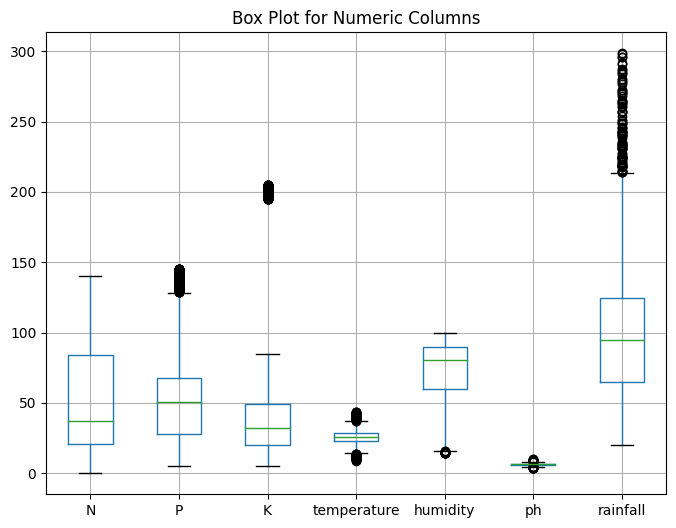

In [63]:
#Box Plot
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title('Box Plot for Numeric Columns')
plt.show()

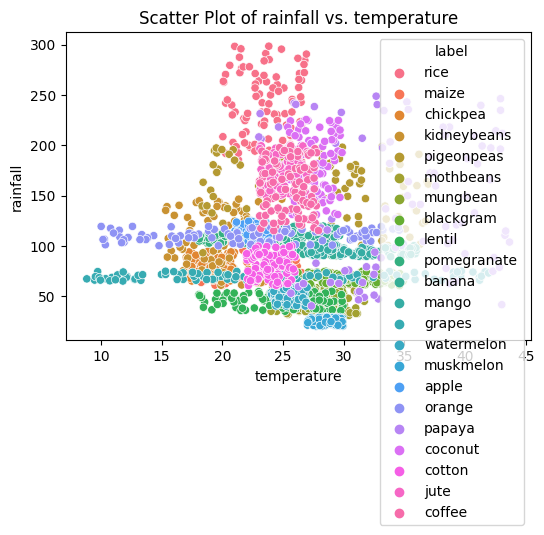

In [61]:
# Scatter plot to visualize relationships between two variables
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='temperature', y='rainfall', hue='label')
plt.title('Scatter Plot of rainfall vs. temperature')
plt.show()

In [17]:

print("average ratio of nitrogen in soil: {0:.2f}", format(data["N"].mean()))
print("average ratio of phosphorous in soil: {0:.2f}", format(data["P"].mean()))
print("average ratio of potassium in soil: {0:.2f}", format(data["K"].mean()))
print("average temperature in celsius: {0:.2f}", format(data["temperature"].mean()))
print("average relative humidity in %: {0:.2f}", format(data["humidity"].mean()))
print("average ph value: {0:.2f}", format(data["ph"].mean()))
print("average rainfall in mm: {0:.2f}", format(data["rainfall"].mean()))

average ratio of nitrogen in soil: {0:.2f} 50.551818181818184
average ratio of phosphorous in soil: {0:.2f} 53.36272727272727
average ratio of potassium in soil: {0:.2f} 48.14909090909091
average temperature in celsius: {0:.2f} 25.616243851779544
average relative humidity in %: {0:.2f} 71.48177921778637
average ph value: {0:.2f} 6.469480065256364
average rainfall in mm: {0:.2f} 103.46365541576817


In [18]:
@interact
def summary(crops= list(data['label'].value_counts().index)):
    x=data[data['label']== crops]
    print("-------------------------------------")
    print('statistics for nitrogen')
    print("minimum nitrogen required :", x['N'].min())
    print("average nitrogen required :", x['N'].mean())
    print("maximum nitrogen required :", x['N'].max())
    print("--------------------------------------")
    print("statistics for phosphorous")
    print("minimum phosphorous required :", x['P'].min())
    print("average phosphorous required :", x['P'].mean())
    print("maximum phosphorous required :", x['P'].max())
    print("--------------------------------------")
    print("statistics for potassium")
    print("minimum potassium required :", x['K'].min())
    print("average potassium required :", x['K'].mean())
    print("maximum potassium required :", x['K'].max())
    print("--------------------------------------")
    print("statistics for temperature")
    print("minimum temperature required : {0:.2f}".format(x['temperature'].min()))
    print("average temperature required : {0:.2f}".format(x['temperature'].mean()))
    print("maximum temperature required : {0:.2f}".format(x['temperature'].max()))
    print("--------------------------------------")
    print("statistics for humidity")
    print("minimum humidity required : {0:.2f}".format(x['humidity'].min()))
    print("average humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("maximum humidity required : {0:.2f}".format(x['humidity'].max()))
    print("--------------------------------------")
    print("statistics for PH")
    print("minimum PH required : {0:.2f}".format(x['ph'].min()))
    print("average PH required : {0:.2f}".format(x['ph'].mean()))
    print("maximum PH required : {0:.2f}".format(x['ph'].max()))
    print("--------------------------------------")
    print("statistics for rainfall")
    print("minimum rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("average rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("maximum rainfall required : {0:.2f}".format(x['rainfall'].max()))
    
    

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [19]:
@interact
def compare(conditions= ['N','P','K','temperature','ph','humidity','rainfall']):
    print("crops which require more than average", conditions, '\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("---------------------------------------------------------------")
    print("crops which require below than average", conditions, '\n')
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [20]:
print("some interesting patterns")

print("crops which require very high ratio of nitrogen in soil :", data[data['N']> 120]['label'].unique())
print("crops which require very high ratio of phosphorous in soil :", data[data['P']> 100]['label'].unique())
print("crops which require very high ratio of potassium in soil :", data[data['K']> 200]['label'].unique())
print("crops which require very high rainfall :", data[data['rainfall']> 200]['label'].unique())
print("crops which require very high temperature :", data[data['temperature']> 40]['label'].unique())
print("crops which require very low temperature :", data[data['temperature']< 10]['label'].unique())
print("crops which require very high ph :", data[data['ph']> 9]['label'].unique())
print("crops which require very low ph :", data[data['ph']< 4]['label'].unique())
print("crops which require very low humidity :", data[data['humidity']< 20]['label'].unique())

some interesting patterns
crops which require very high ratio of nitrogen in soil : ['cotton']
crops which require very high ratio of phosphorous in soil : ['grapes' 'apple']
crops which require very high ratio of potassium in soil : ['grapes' 'apple']
crops which require very high rainfall : ['rice' 'papaya' 'coconut']
crops which require very high temperature : ['grapes' 'papaya']
crops which require very low temperature : ['grapes']
crops which require very high ph : ['mothbeans']
crops which require very low ph : ['mothbeans']
crops which require very low humidity : ['chickpea' 'kidneybeans']


In [8]:
# Calculate correlations among numeric columns, excluding the 'label' column
numeric_cols = data.select_dtypes(include=[float, int]).columns  # Select only numeric columns
correlation_matrix = data[numeric_cols].corr()


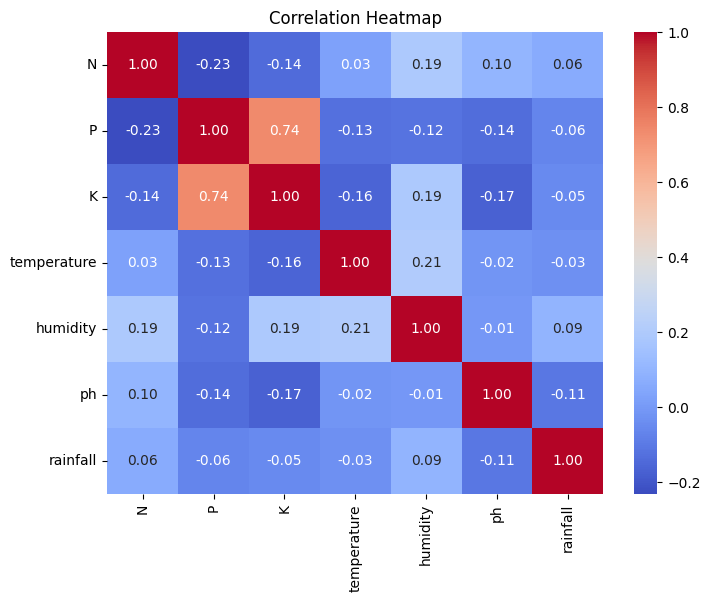

In [9]:
#Correlation
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # 'fmt' specifies float format
plt.title("Correlation Heatmap")
plt.show()


### MODEL BUILDING

In [10]:
# identifying dependent and independent variables
y=data['label']
x=data.drop(['label'], axis=1)

In [11]:
#Splitting teh dataset into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [26]:
#Logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics  # For accuracy_score and other metrics
from sklearn.metrics import classification_report  # For detailed metrics

# Create a Logistic Regression model
logistic_reg = LogisticRegression(solver='lbfgs', max_iter=1000)  # Using the LBFGS solver with a high iteration limit

# Fit the logistic regression model to the training data
logistic_reg.fit(x_train, y_train)

# Predict the test data
y_pred_log_reg = logistic_reg.predict(x_test)

# Calculate the accuracy of the logistic regression model
accuracy_log_reg = metrics.accuracy_score(y_test, y_pred_log_reg)

# Print the accuracy
print("Logistic Regression's Accuracy:", accuracy_log_reg * 100, "%")

# Generate a classification report for additional metrics
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression's Accuracy: 97.5 %
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.88      1.00      0.94        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.95      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.94      0.97        17
       maize       1.00      0.89      0.94        18
       mango       0.95      1.00      0.98        21
   mothbeans       0.96      0.88      0.92        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00      

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
#DECISION TREE 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics  # For accuracy_score and other metrics
from sklearn.metrics import classification_report  # For detailed metrics

# Create a Decision Tree classifier with specific parameters
decision_tree = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)

# Fit the Decision Tree model to the training data
decision_tree.fit(x_train, y_train)

# Predict outcomes using the test data
y_pred_tree = decision_tree.predict(x_test)

# Calculate the accuracy of the Decision Tree model
accuracy_tree = metrics.accuracy_score(y_test, y_pred_tree)

# Print the accuracy
print("Decision Tree's Accuracy:", accuracy_tree * 100, "%")

# Generate a classification report for more insights
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_tree))


Decision Tree's Accuracy: 92.5 %
Classification Report for Decision Tree:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.73      1.00      0.85        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      0.82      0.90        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.38      0.55        21
 kidneybeans       1.00      0.85      0.92        20
      lentil       0.89      1.00      0.94        17
       maize       0.72      1.00      0.84        18
       mango       1.00      0.90      0.95        21
   mothbeans       1.00      0.56      0.72        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       0.96      1.00      0.98        23
      o

In [25]:
#SVM 
from sklearn.svm import SVC
from sklearn import metrics  # For accuracy_score and other metrics
from sklearn.metrics import classification_report  # For detailed metrics

# Create an SVM classifier
svm = SVC(kernel='linear', C=1)  # Using a linear kernel and regularization parameter C=1

# Fit the SVM model to the training data
svm.fit(x_train, y_train)

# Predict outcomes using the test data
y_pred_svm = svm.predict(x_test)

# Calculate the accuracy of the SVM model
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)

# Print the accuracy
print("SVM's Accuracy:", accuracy_svm * 100, "%")

# Generate a classification report for more insights
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))


SVM's Accuracy: 98.86363636363636 %
Classification Report for SVM:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.96      1.00      0.98        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      0.94      0.97        16
      grapes       1.00      1.00      1.00        18
        jute       0.91      0.95      0.93        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       0.95      1.00      0.97        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.96      0.98        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange  

### Accuracy Comparison

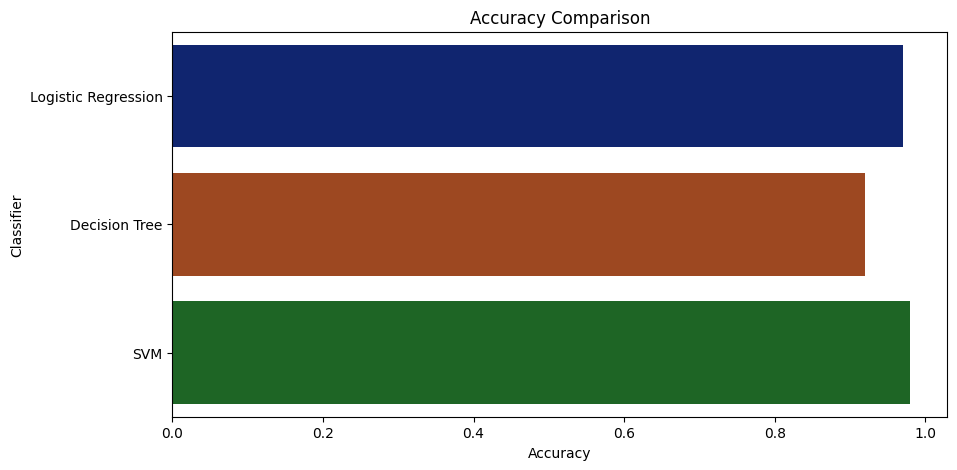

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

acc = [0.97, 0.92, 0.98]  
model = ['Logistic Regression', 'Decision Tree', 'SVM']  # Corresponding classifier names

# Create a bar plot to compare accuracies
plt.figure(figsize=[10, 5], dpi=100)  
plt.title('Accuracy Comparison')  
plt.xlabel('Accuracy') 
plt.ylabel('Classifier') 

# Generate the bar plot with accuracy scores and classifier names
sns.barplot(x=acc, y=model, palette='dark')  

# Display the plot
plt.show()


### PREDICTION OF CROPS

In [39]:

# Feature input for prediction
N = 100
P = 56
K = 120
temperature = 23.603016
humidity = 80
ph = 90
rainfall = 140.91

# Format input as a 2D NumPy array
prediction_input = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

# Make prediction using the trained SVM model
prediction_result = svm.predict(prediction_input)  

# Print the prediction result
print("Prediction for given climatic conditions:", prediction_result[0])  

Prediction for given climatic conditions: papaya


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
